In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('diabetes.csv', sep=',')


In [4]:
df.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Precisión del modelo KNN: 0.69

Reporte de clasificación:

              precision  recall  f1-score  support
0                  0.75    0.80      0.77    99.00
1                  0.58    0.51      0.54    55.00
accuracy           0.69    0.69      0.69     0.69
macro avg          0.66    0.65      0.66   154.00
weighted avg       0.69    0.69      0.69   154.00


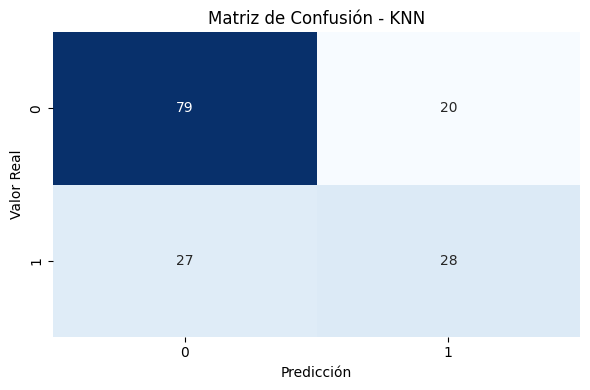

In [6]:


# Separar características (X) y etiqueta (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar la exactitud con 2 decimales
print(f"Precisión del modelo KNN: {accuracy:.2f}\n")

# Convertir el classification report en DataFrame y redondear
report_df = pd.DataFrame(report).transpose().round(2)

# Mostrar el reporte como tabla
print("Reporte de clasificación:\n")
print(report_df)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Gráfico de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN')
plt.tight_layout()
plt.show()